In [1]:
import os
import yaml
from glob import glob
from pprint import pprint

import matplotlib.pyplot as plt
import numpy as np

from mejiro.analysis import lensing
from mejiro.plots import corner
from mejiro.utils import util

# read configuration file
with open('roman_test.yaml', 'r') as f:
    config = yaml.load(f, Loader=yaml.SafeLoader)

if config['dev']:
    config['pipeline_label'] += '_dev'

In [2]:
data_dir = os.path.join(config['data_dir'], config['pipeline_label'], '03')

pickles = sorted(glob(os.path.join(data_dir, 'subhalos', 'subhalo_realization_*.pkl')))
print(f'Found {len(pickles)} pickle(s) in {data_dir}')

Found 661 pickle(s) in /data/bwedig/mejiro/roman_test_dev/03


In [3]:
sample_realization = util.unpickle(pickles[0])
print(sample_realization)

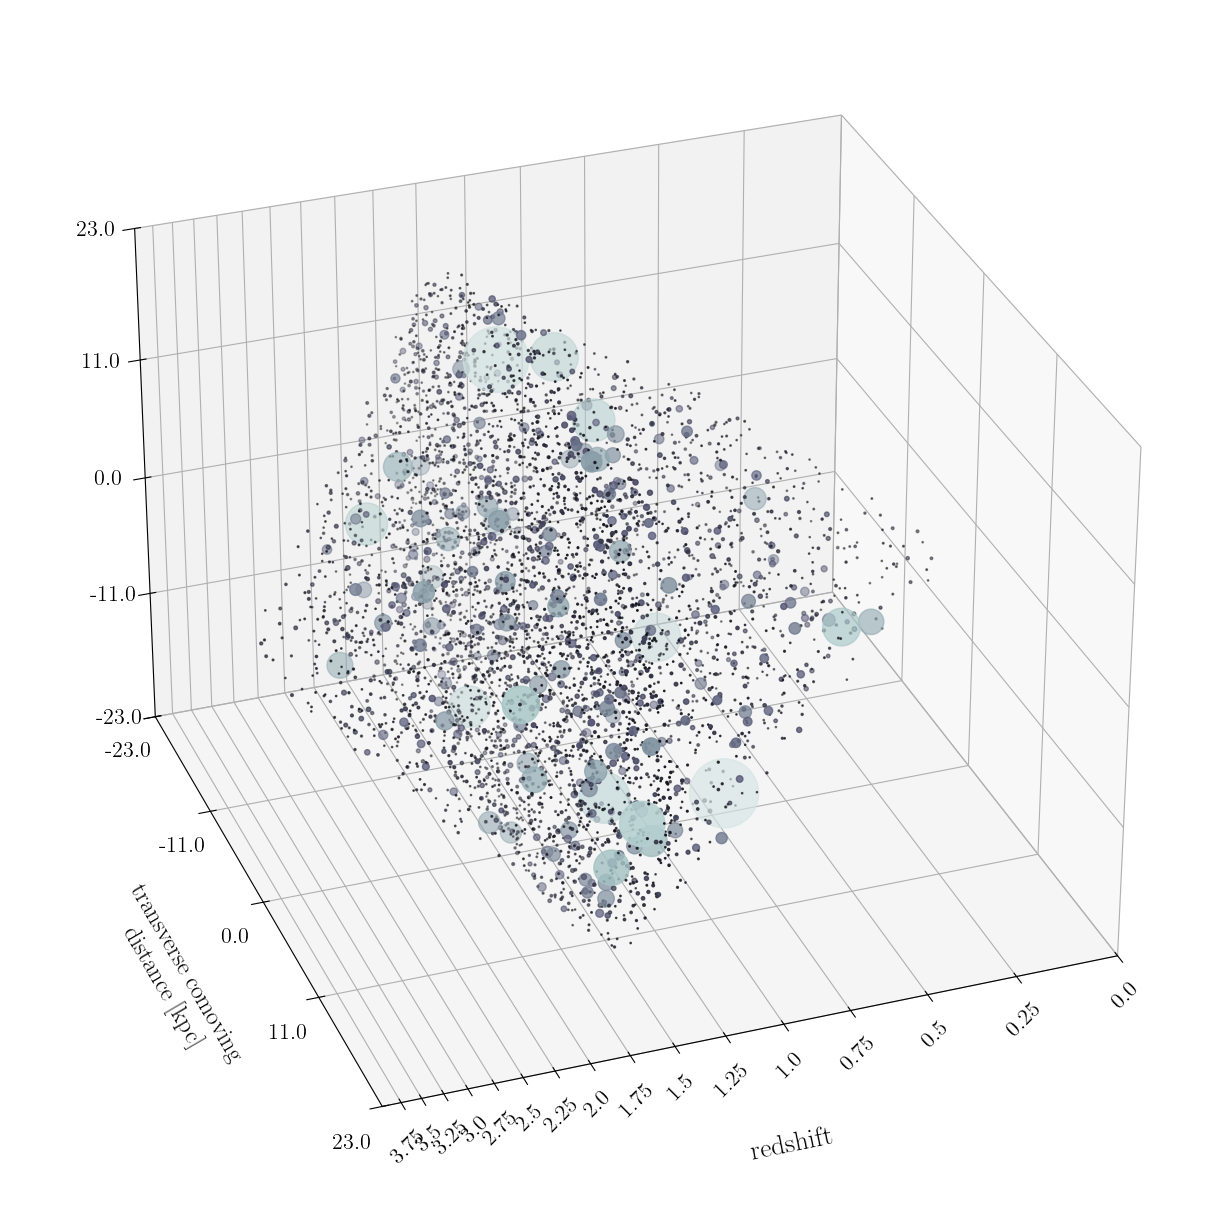

In [4]:
f = plt.figure(figsize=(14, 12))
ax = f.add_subplot(111, projection='3d')
sample_realization.plot(ax)

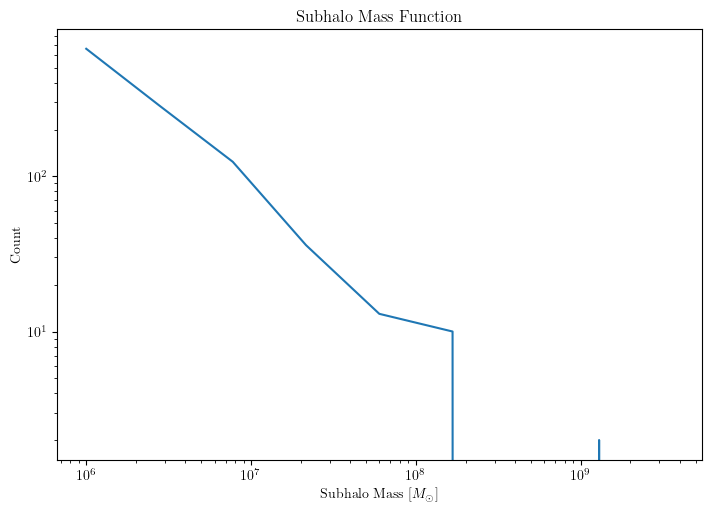

In [5]:
plt.loglog(*lensing.get_subhalo_mass_function(sample_realization))
plt.title('Subhalo Mass Function')
plt.xlabel('Subhalo Mass [$M_\odot$]')
plt.ylabel('Count')
plt.show()

In [6]:
largest_halo = max(sample_realization.halos, key=lambda halo: halo.mass)
print(f'Largest halo has mass {largest_halo.mass:.2e} Msun\n')

pprint(largest_halo.__dict__)

Largest halo has mass 3.26e+09 Msun

{'_args': {},
 '_c': 7.288790299236493,
 '_concentration_class': <pyHalo.Halos.concentration.ConcentrationLudlow object at 0x7f0a51df98d0>,
 '_kwargs_lenstronomy': [{'Rs': 0.3714884811,
                          'alpha_Rs': 0.0059315231,
                          'center_x': 0.6423,
                          'center_y': -0.7823,
                          'r_trunc': 4.298180168326619}],
 '_lens_cosmo': <pyHalo.Halos.lens_cosmo.LensCosmo object at 0x7f0a521dfa30>,
 '_nfw_params': [7742156.520540173, 3.0054591986778894, 21.906161852074483],
 '_profile_args': (7.288790299236493, 34.773864368568674),
 '_rescale_norm': 1.0,
 '_rescaled_once': False,
 '_truncation_class': <pyHalo.Halos.tidal_truncation.TruncationRN object at 0x7f0a51df9c60>,
 '_zeval': 0.93,
 'fixed_position': False,
 'is_subhalo': False,
 'lens_cosmo': <pyHalo.Halos.lens_cosmo.LensCosmo object at 0x7f0a521dfa30>,
 'mass': 3263354542.673691,
 'mdef': 'TNFW',
 'r3d': None,
 'tnfw_lenstronom

# Review failed systems

In [7]:
lenses = util.unpickle_all(os.path.join(data_dir, 'sca*'), prefix="lens_")
print(f'Found {len(lenses)} lens(es) in {data_dir}')

Found 1324 lens(es) in /data/bwedig/mejiro/roman_test_dev/03


In [8]:
failed_lenses = util.unpickle_all(data_dir, prefix="failed_")
print(f'{len(failed_lenses)} failed out of {len(lenses)} systems, {len(failed_lenses) / len(lenses) * 100:.2f} percent')

1 failed out of 1324 systems, 0.08 percent


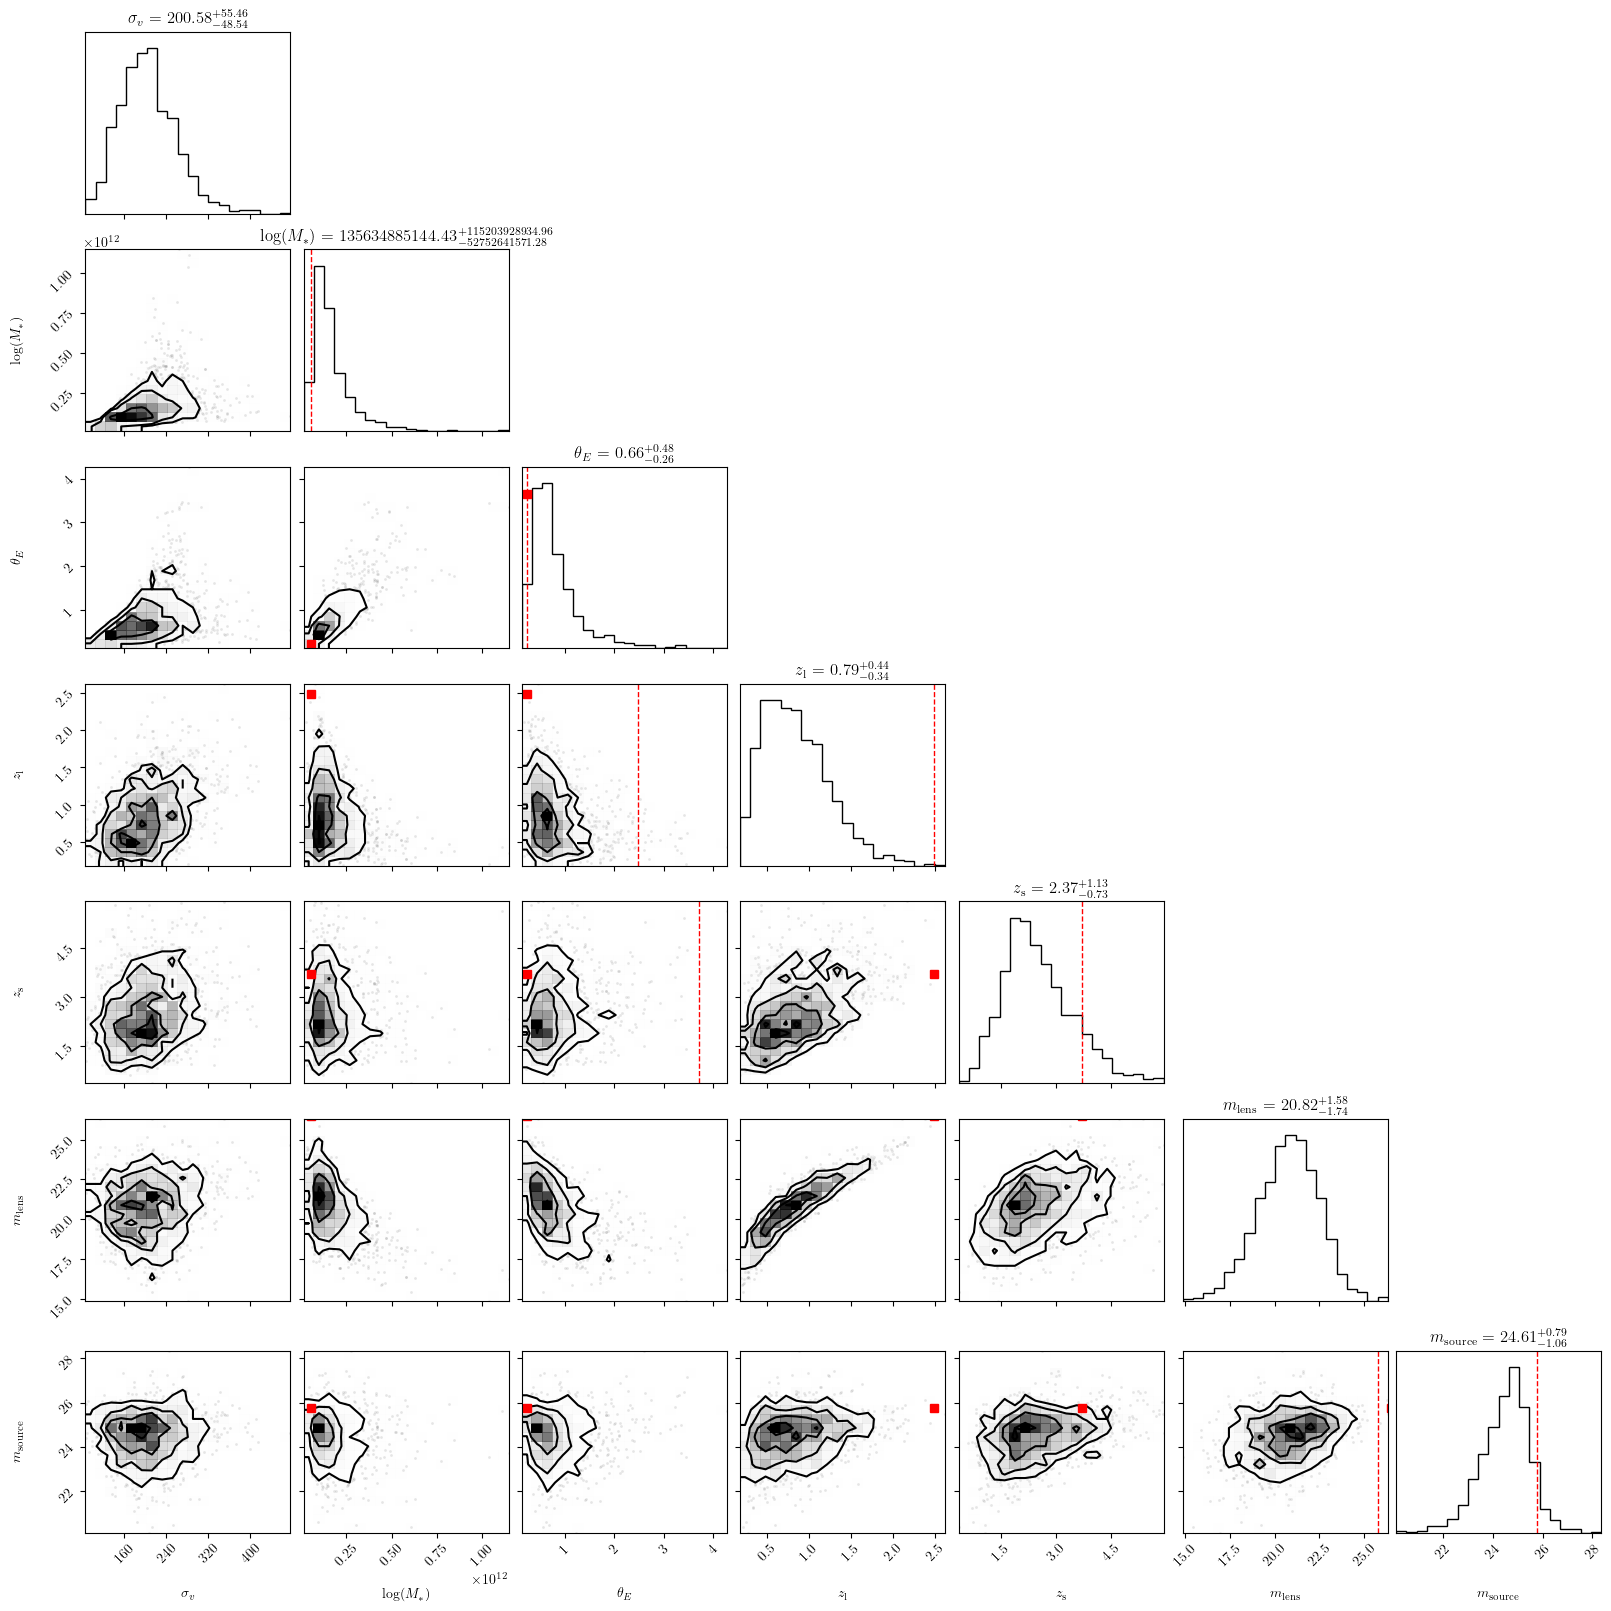

In [9]:
total_corner = corner.overview(lenses, 'F129', quantiles=None)
corner.overplot_points(total_corner, failed_lenses)